In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [10]:
# Set seaborn style for nice plots
sns.set(style="whitegrid")

# Load the CSV data (adjust the path if needed)
movies_df = pd.read_csv(r"D:/MSIS/ME proj/Recommendation system/movie_recommendation_system/data/raw/movies.csv", encoding="latin-1", sep="\t")

# Display basic info and first few rows
print("Shape of dataset:", movies_df.shape)
movies_df.head()

Shape of dataset: (3883, 4)


,Unnamed: 0,movie_id,title,genres
0,0,1,Toy Story (1995),Animation|Children's|Comedy
1,1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama
4,4,5,Father of the Bride Part II (1995),Comedy


In [11]:
# Basic info and missing values check
movies_df.info()

# Check for duplicates
print("Number of duplicate rows:", movies_df.duplicated().sum())

# Summary statistics (only movie_id is numeric here)
movies_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3883 non-null   int64 
 1   movie_id    3883 non-null   int64 
 2   title       3883 non-null   object
 3   genres      3883 non-null   object
dtypes: int64(2), object(2)
memory usage: 121.5+ KB
Number of duplicate rows: 0


,Unnamed: 0,movie_id
count,3883.000000,3883.000000
mean,1941.000000,1986.049446
std,1121.069876,1146.778349
min,0.000000,1.000000
25%,970.500000,982.500000
50%,1941.000000,2010.000000
75%,2911.500000,2980.500000
max,3882.000000,3952.000000


genres
Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
Name: count, dtype: int64


C:\Users\vilok\AppData\Local\Temp\ipykernel_12596\780944032.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


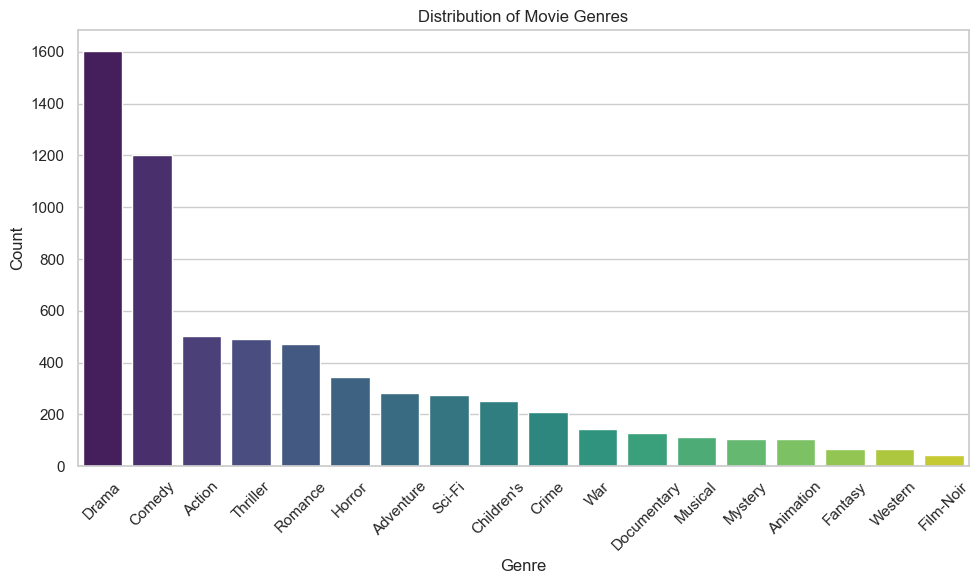

In [12]:
# Explode the genres into separate rows for frequency analysis
# Each movie may have multiple genres separated by '|'
genres_series = movies_df['genres'].str.split('|').explode()

# Count frequency of genres
genre_counts = genres_series.value_counts()
print(genre_counts)

# Plot the genre distribution
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Distribution of Movie Genres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

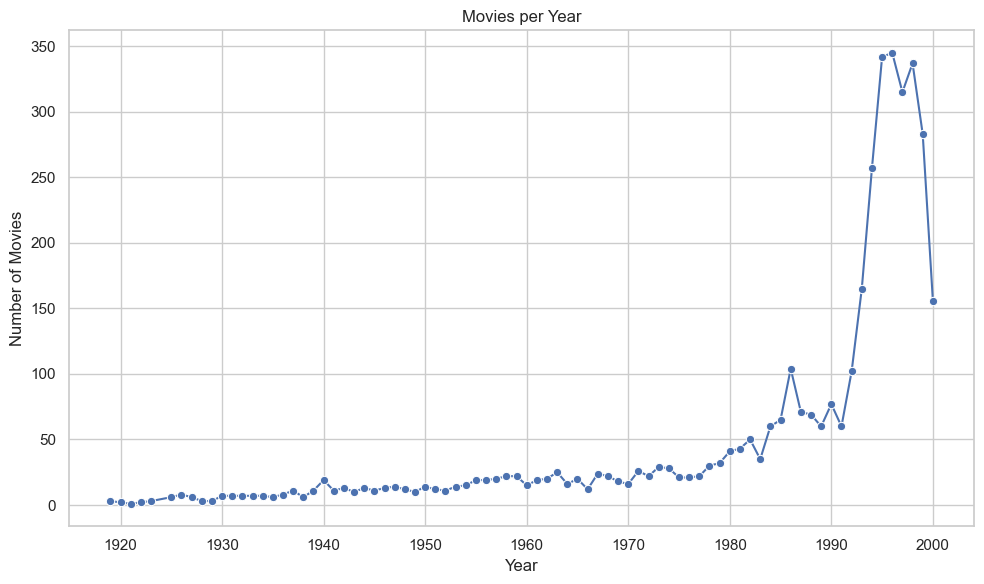

In [13]:
# Many movie titles come with the release year in parentheses.
# Use a regex to extract the year.
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)', expand=False)
movies_df['year'] = pd.to_numeric(movies_df['year'], errors='coerce')

# Drop entries with missing year (if any)
movies_with_year = movies_df.dropna(subset=['year'])

# Count movies per year
year_counts = movies_with_year['year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Movies per Year")
plt.tight_layout()
plt.show()

In [14]:
# Check the most common movies by genre count (if needed)
top_movies = movies_df.head(10)
print("Top 10 movies:\n", top_movies[['movie_id', 'title', 'genres']])

Top 10 movies:
    movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
5         6                         Heat (1995)         Action|Crime|Thriller
6         7                      Sabrina (1995)                Comedy|Romance
7         8                 Tom and Huck (1995)          Adventure|Children's
8         9                 Sudden Death (1995)                        Action
9        10                    GoldenEye (1995)     Action|Adventure|Thriller


Title Length Statistics:
count    3883.000000
mean       24.202678
std         9.951110
min         8.000000
25%        17.000000
50%        22.000000
75%        28.000000
max        82.000000
Name: title_length, dtype: float64


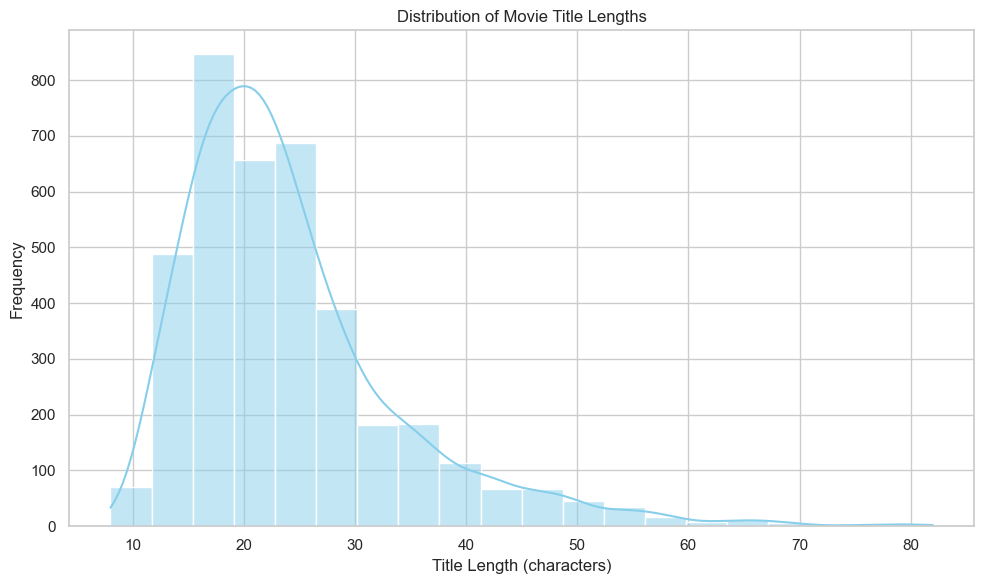

In [15]:
# Compute title lengths (excluding extra whitespace)
movies_df['title_length'] = movies_df['title'].str.strip().str.len()

# Print descriptive statistics of title lengths
print("Title Length Statistics:")
print(movies_df['title_length'].describe())

# Plot a histogram of title lengths
plt.figure(figsize=(10,6))
sns.histplot(movies_df['title_length'], bins=20, kde=True, color="skyblue")
plt.xlabel("Title Length (characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Title Lengths")
plt.tight_layout()
plt.show()